In [51]:
#Importing the required libraries
import os
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#Reading in the dataset
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# Counting the number of ones and zeros (death event)
ones_count = df['DEATH_EVENT'].value_counts().get(1, 0)
zeros_count = df['DEATH_EVENT'].value_counts().get(0, 0)

print("Number of patients dead:", ones_count)
print("Number of patients survived:", zeros_count)
#2.114 times more zeros

Number of patients dead: 96
Number of patients survived: 203


In [4]:
# Checking for missing values
missing_values = df.isnull().sum()

# Printing the count of missing values
print("Missing values:\n", missing_values)

Missing values:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [5]:
#Checking for NA values
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
# To check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
#Describing the dataset
df.describe() 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


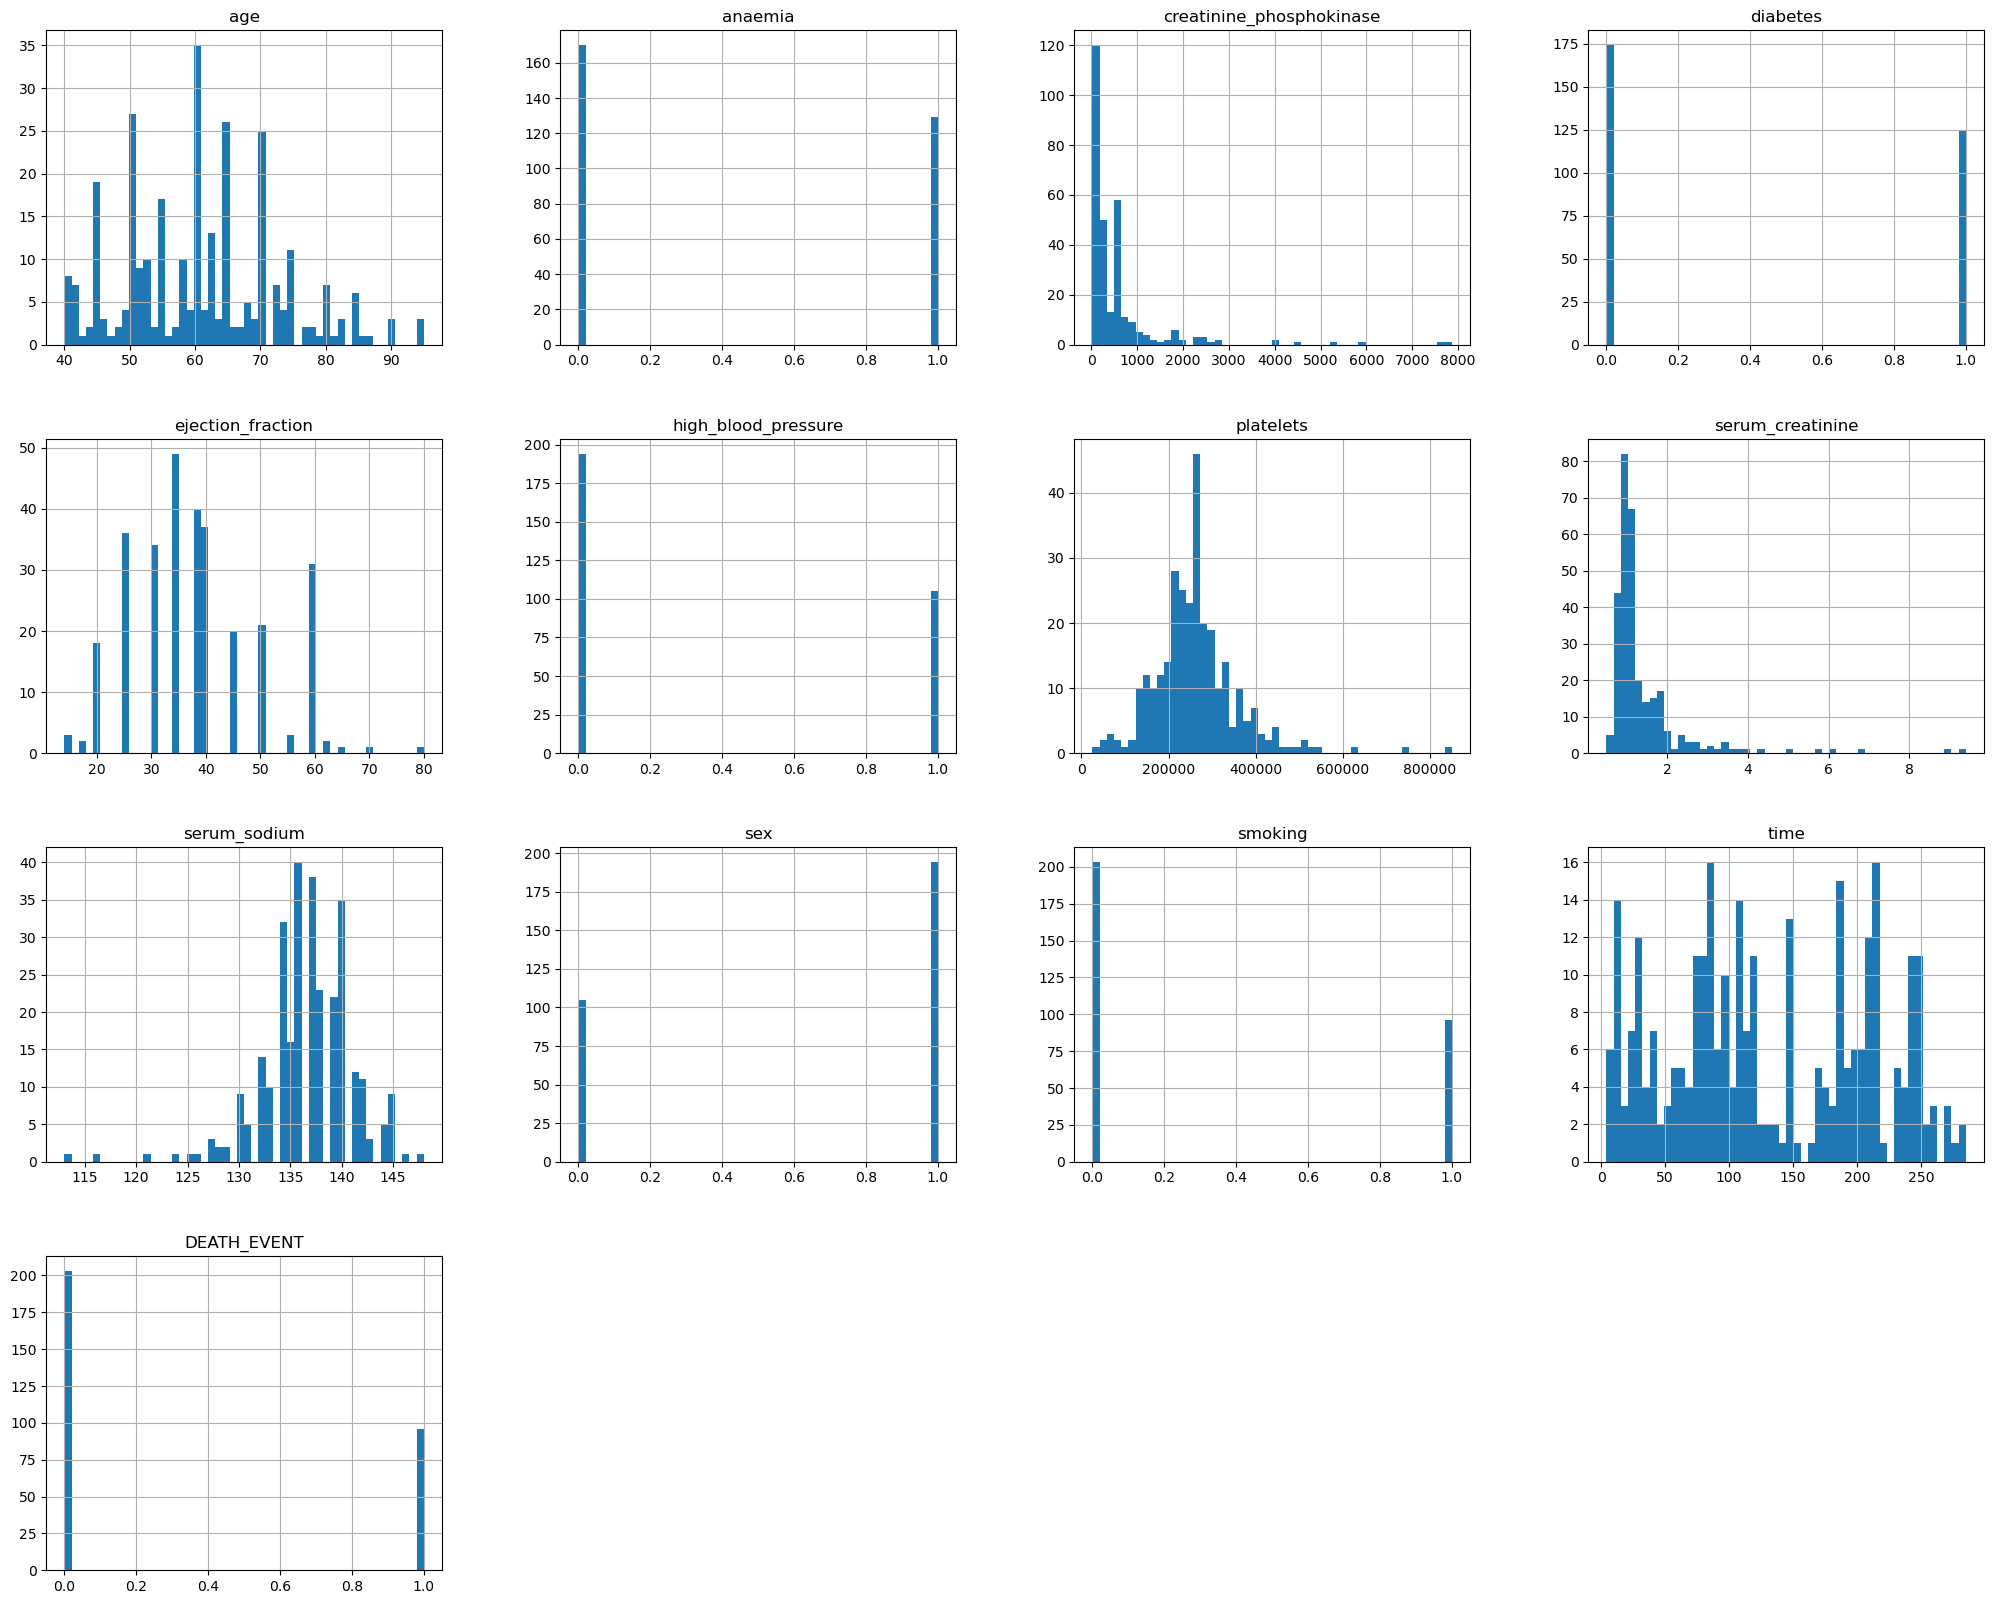

In [8]:
 #plotting histograms for all the features in the dataset.
df.hist(bins=50, figsize=(25, 20))
plt.show()

In [9]:
# Check the data types of columns
data_types = df.dtypes
print(data_types)


age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


In [10]:
# Identifying categorical variables
categorical_vars = []
for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) == 2 and set(unique_values) == {0, 1}:
        categorical_vars.append(column)

# Identifying the continuous variables
continuous_vars = []
for column in df.columns:
    if column not in categorical_vars and df[column].dtype in ['int64', 'float64']:
        continuous_vars.append(column)

print("Categorical Variables:")
print(categorical_vars)

print("Continuous Variables:")
print(continuous_vars)

Categorical Variables:
['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
Continuous Variables:
['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


,DEATH_EVENT,time,serum_sodium,serum_creatinine,platelets,ejection_fraction,creatinine_phosphokinase,age
DEATH_EVENT,1.000000,-0.526964,-0.195204,0.294278,-0.049139,-0.268603,0.062728,0.253729
time,-0.526964,1.000000,0.087640,-0.149315,0.010514,0.041729,-0.009346,-0.224068
serum_sodium,-0.195204,0.087640,1.000000,-0.189095,0.062125,0.175902,0.059550,-0.045966
serum_creatinine,0.294278,-0.149315,-0.189095,1.000000,-0.041198,-0.011302,-0.016408,0.159187
platelets,-0.049139,0.010514,0.062125,-0.041198,1.000000,0.072177,0.024463,-0.052354
ejection_fraction,-0.268603,0.041729,0.175902,-0.011302,0.072177,1.000000,-0.044080,0.060098
creatinine_phosphokinase,0.062728,-0.009346,0.059550,-0.016408,0.024463,-0.044080,1.000000,-0.081584
age,0.253729,-0.224068,-0.045966,0.159187,-0.052354,0.060098,-0.081584,1.000000


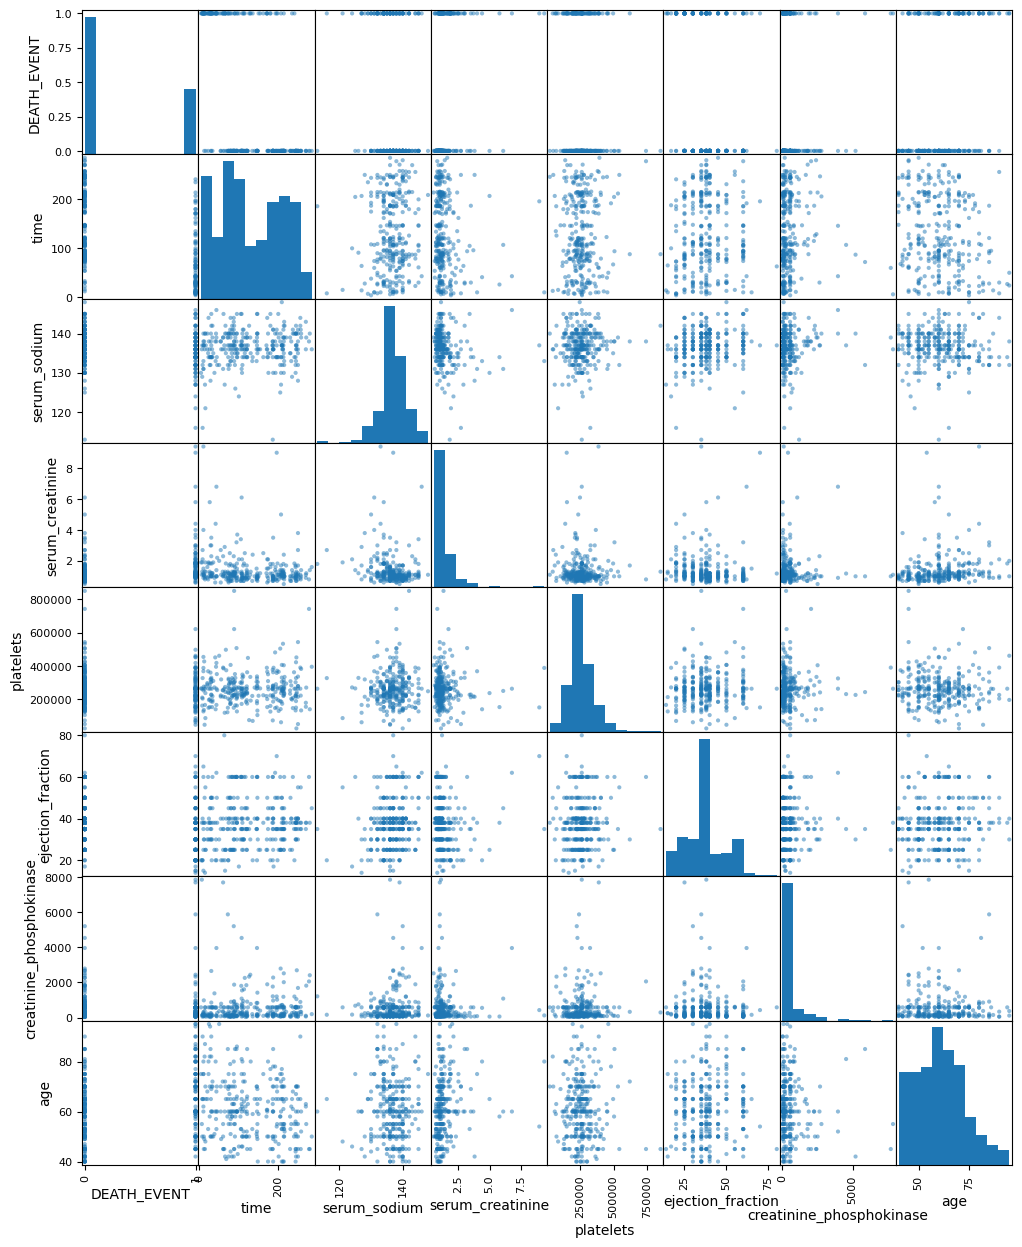

In [11]:
#Scatter matrix 
pd.plotting.scatter_matrix(df[['DEATH_EVENT','time','serum_sodium','serum_creatinine', 'platelets',
                                  'ejection_fraction','creatinine_phosphokinase','age']], figsize=(12,15)); df[['DEATH_EVENT','time','serum_sodium','serum_creatinine',
                                        'platelets','ejection_fraction','creatinine_phosphokinase','age']].corr()


In [12]:
# checking version number
import imblearn
print(imblearn.__version__)

0.11.0


In [13]:
#Function which gives all the metrics of a model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [14]:
# Selecting the features (X) and target variable (y)
X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 'high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']]
y = df['DEATH_EVENT']


In [15]:
from sklearn.model_selection import train_test_split

# Assuming the feature data in X and target variable in y

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)

# The 'test_size' parameter determines the proportion of the data that will be allocated for testing.
# Here, 30% of the data will be used for testing, and 70% for training.
# The 'random_state' parameter is used to ensure reproducibility of the split.

# Print the shape of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (209, 12)
X_test shape: (90, 12)
y_train shape: (209,)
y_test shape: (90,)


### KNN

In [16]:
#KNN model
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred_knn = model.predict(X_test)

In [17]:
print(accuracy_score(y_test,y_pred_knn))
pd.crosstab(y_test,y_pred_knn)

0.6555555555555556


col_0,0,1
DEATH_EVENT,,
0,54,10
1,21,5


In [18]:
generate_model_report(y_test, y_pred_knn)

Accuracy =  0.6555555555555556
Precision =  0.3333333333333333
Recall =  0.19230769230769232
F1 Score =  0.2439024390243902


### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [20]:
clf = LogisticRegression().fit(X_train, y_train)

In [21]:
Y_Test_Pred = clf.predict(X_test)

In [22]:
pd.crosstab(Y_Test_Pred, y_test, rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,55,6
1,9,20


In [23]:
generate_model_report(y_test, Y_Test_Pred)

Accuracy =  0.8333333333333334
Precision =  0.6896551724137931
Recall =  0.7692307692307693
F1 Score =  0.7272727272727274


In [24]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

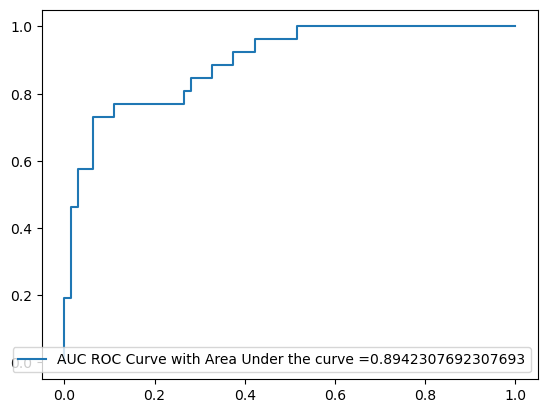

In [25]:
generate_auc_roc_curve(clf, X_test)

### Logistic Regression with SMOTE

In [26]:
sm = SMOTE(random_state=12, sampling_strategy=1.0)
x_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [27]:
lr_smote_model = LogisticRegression().fit(x_train_res, y_train_res)

In [28]:
Y_test_Pred = lr_smote_model.predict(X_test)
pd.crosstab(Y_test_Pred, y_test, rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,44,4
1,20,22


In [29]:
generate_model_report(y_test, Y_test_Pred)

Accuracy =  0.7333333333333333
Precision =  0.5238095238095238
Recall =  0.8461538461538461
F1 Score =  0.6470588235294118


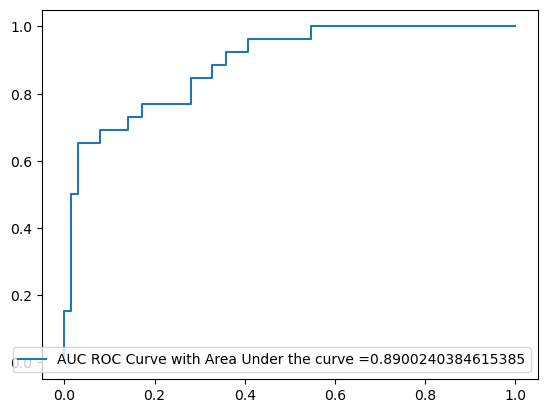

In [30]:
generate_auc_roc_curve(lr_smote_model, X_test)

### Random Forest


In [31]:
from sklearn.ensemble import RandomForestClassifier

# Creating a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=40)

# Training the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_predrf = rf_classifier.predict(X_test)

# Calculating the accuracy of the model
accuracy_rf = accuracy_score(y_test, y_predrf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.8111111111111111


In [32]:
generate_model_report(y_test, y_predrf)

Accuracy =  0.8111111111111111
Precision =  0.6363636363636364
Recall =  0.8076923076923077
F1 Score =  0.7118644067796609


### Random Forest with SMOTE

In [33]:
rf_smote_model = rf_classifier.fit(x_train_res, y_train_res)
Y_test_Pred_rf = rf_smote_model.predict(X_test)
pd.crosstab(Y_test_Pred_rf, y_test, rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,49,5
1,15,21


In [34]:
generate_model_report(y_test, Y_test_Pred_rf)

Accuracy =  0.7777777777777778
Precision =  0.5833333333333334
Recall =  0.8076923076923077
F1 Score =  0.6774193548387097


### Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Creating a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=40)

# Training the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred_dt = dt_classifier.predict(X_test)

# Calculating the accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)


Accuracy: 0.7666666666666667


In [36]:
generate_model_report(y_test, y_pred_dt)

Accuracy =  0.7666666666666667
Precision =  0.5925925925925926
Recall =  0.6153846153846154
F1 Score =  0.6037735849056604


### Decision Tree with SMOTE

In [37]:
dt_smote_model = dt_classifier.fit(x_train_res, y_train_res)
Y_test_Pred_dt = dt_smote_model.predict(X_test)
pd.crosstab(Y_test_Pred_dt, y_test, rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,50,7
1,14,19


In [38]:
generate_model_report(y_test, Y_test_Pred_dt)

Accuracy =  0.7666666666666667
Precision =  0.5757575757575758
Recall =  0.7307692307692307
F1 Score =  0.6440677966101696


### SVM

In [39]:
from sklearn.svm import SVC

# Creating an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=40)

# Training the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred_svm = svm_classifier.predict(X_test)

# Calculating the accuracy of the model
acc = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", acc)


Accuracy: 0.8111111111111111


In [40]:
generate_model_report(y_test, y_pred_svm)

Accuracy =  0.8111111111111111
Precision =  0.6666666666666666
Recall =  0.6923076923076923
F1 Score =  0.6792452830188679


In [41]:
print(metrics.classification_report(y_test, y_pred = y_pred_svm ))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87        64
           1       0.67      0.69      0.68        26

    accuracy                           0.81        90
   macro avg       0.77      0.78      0.77        90
weighted avg       0.81      0.81      0.81        90



In [42]:
# Creating an SVM rbf classifier
svm_classifier_rad = SVC(kernel='rbf', random_state=40)

# Training the classifier on the training data
svm_classifier_rad.fit(X_train, y_train)

# Making predictions on the test data
y_pred_svm_rad = svm_classifier_rad.predict(X_test)

# Calculating the accuracy of the model
acc_rad = accuracy_score(y_test, y_pred_svm_rad)
print("Accuracy:", acc_rad)


Accuracy: 0.7111111111111111


In [43]:
generate_model_report(y_test, y_pred_svm_rad)
#Implies imbalance due to parameters being zero

Accuracy =  0.7111111111111111
Precision =  0.0
Recall =  0.0
F1 Score =  0.0


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM with SMOTE

In [44]:
#Linear
svm_smote_model = svm_classifier.fit(x_train_res, y_train_res)
Y_test_Pred_svm = svm_smote_model.predict(X_test)
pd.crosstab(Y_test_Pred_svm, y_test, rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,47,4
1,17,22


In [45]:
generate_model_report(y_test, Y_test_Pred_svm)

Accuracy =  0.7666666666666667
Precision =  0.5641025641025641
Recall =  0.8461538461538461
F1 Score =  0.676923076923077


In [46]:
#Radial
svm_rad_smote_model = svm_classifier_rad.fit(x_train_res, y_train_res)
Y_test_Pred_rad = svm_rad_smote_model.predict(X_test)
pd.crosstab(Y_test_Pred_rad, y_test, rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,53,21
1,11,5


In [47]:
generate_model_report(y_test, Y_test_Pred_rad)

Accuracy =  0.6444444444444445
Precision =  0.3125
Recall =  0.19230769230769232
F1 Score =  0.2380952380952381


### ROUGH TRIAL WORK

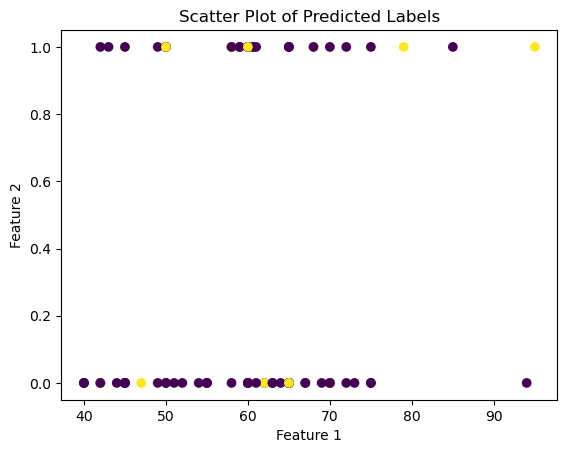

In [48]:
# Plot the scatter plot (SVM RAD SMOTE)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=Y_test_Pred_rad)

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Predicted Labels')

# Show the plot
plt.show()


In [50]:
df1 = df
# Define a function to convert binary to "Yes" and "No"
def binary_to_yes_no(value):
    if value == 0:
        return "No"
    elif value == 1:
        return "Yes"
    else:
        return value

# Apply the conversion function selectively to binary columns
binary_columns = df1.select_dtypes(include=['int64']).columns
df1[binary_columns] = df1[binary_columns].applymap(binary_to_yes_no)

# Display the updated DataFrame
print(df1)


      age anaemia  creatinine_phosphokinase diabetes  ejection_fraction  \
0    75.0      No                       582       No                 20   
1    55.0      No                      7861       No                 38   
2    65.0      No                       146       No                 20   
3    50.0     Yes                       111       No                 20   
4    65.0     Yes                       160      Yes                 20   
..    ...     ...                       ...      ...                ...   
294  62.0      No                        61      Yes                 38   
295  55.0      No                      1820       No                 38   
296  45.0      No                      2060      Yes                 60   
297  45.0      No                      2413       No                 38   
298  50.0      No                       196       No                 45   

    high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                   Yes 

In [52]:

# Assuming 'target' is your target variable column name
target_column = 'DEATH_EVENT'

# Separate your target variable from the rest of the dataset
X1 = df1.drop(target_column, axis=1)
y1 = df1[target_column]

# Create separate lists for numerical and categorical columns
numerical_features = X1.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X1.select_dtypes(exclude=[np.number]).columns.tolist()

# Initialize lists to store selected features
selected_numerical_features = []
selected_categorical_features = []

# Perform ANOVA for numerical features
for feature in numerical_features:
    f_statistic, p_value = stats.f_oneway(*[X1[feature][y1 == category] for category in y1.unique()])
    if p_value < 0.05:  # Adjust the significance threshold as needed
        selected_numerical_features.append(feature)

# Perform chi-squared test for categorical features
for feature in categorical_features:
    contingency_table = pd.crosstab(X1[feature], y1)
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    if p_value < 0.05:  # Adjust the significance threshold as needed
        selected_categorical_features.append(feature)

# Combine selected features
selected_features = selected_numerical_features + selected_categorical_features

# Create a new DataFrame with only the selected features
df_selected = df1[selected_features]

# Now, 'df_selected' contains the dataset with the selected features, and 'X1' and 'y1' are the modified variable names.


DEATH_EVENT,No,Yes
smoking,,
No,137,66
Yes,66,30


In [60]:
# Assuming 'target' is your target variable column name
target_column = 'DEATH_EVENT'

# Display the values of each column in df1
for column in df1.columns:
    print(f"Column: {column}")
    print(df1[column].unique())
    print("\n")

# Separate your target variable from the rest of df1
X1 = df1.drop(target_column, axis=1)
y1 = df1[target_column]

# Create separate lists for numerical and categorical columns
numerical_features = X1.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X1.select_dtypes(exclude=[np.number]).columns.tolist()

# Initialize lists to store selected features, their rationale, and test results
selected_numerical_features = []
selected_categorical_features = []
rationale = []
test_results = []

# Perform ANOVA for numerical features
for feature in numerical_features:
    f_statistic, p_value = stats.f_oneway(*[X1[feature][y1 == category] for category in y1.unique()])
    if p_value < 0.05:  # Adjust the significance threshold as needed
        selected_numerical_features.append(feature)
        rationale.append(f"Selected due to ANOVA (p-value = {p_value:.4f})")
        test_results.append((feature, "ANOVA", p_value))
    else:
        rationale.append(f"Not selected (p-value = {p_value:.4f})")

# Perform chi-squared test for categorical features
for feature in categorical_features:
    contingency_table = pd.crosstab(X1[feature], y1)
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    if p_value < 0.05:  # Adjust the significance threshold as needed
        selected_categorical_features.append(feature)
        rationale.append(f"Selected due to Chi-squared test (p-value = {p_value:.4f})")
        test_results.append((feature, "Chi-squared", p_value))
    else:
        rationale.append(f"Not selected (p-value = {p_value:.4f})")

# Combine selected features
selected_features = selected_numerical_features + selected_categorical_features

# Display the rationale for feature selection and test results for all features in df1
print("Feature Selection Results and Rationale for All Features in df1:")
for feature, reason in zip(df1.columns, rationale):
    print(f"Feature: {feature} - {reason}")

print("\nTest Results for All Features in df1:")
for feature, test_type, p_value in test_results:
    print(f"Feature: {feature} - Test Type: {test_type} - p-value: {p_value:.4f}")

# Create a new DataFrame with only the selected features in df1
df1_selected = df1[selected_features]

# Now, 'df1_selected' contains the dataset with the selected features.


Column: age
[75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]


Column: anaemia
['No' 'Yes']


Column: creatinine_phosphokinase
[ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846 

In [84]:
import pandas as pd
import numpy as np
from scipy import stats
tim = 'time'
df1 = df1.drop(tim, axis=1)
# Assuming 'target' is your target variable column name
target_column = 'DEATH_EVENT'

# Display the values of each column in df1
for column in df1.columns:
    print(f"Column: {column}")
    print(df1[column].unique())
    print("\n")

# Separate your target variable from the rest of df1
X1 = df1.drop(target_column, axis=1)
y1 = df1[target_column]

# Create separate lists for numerical and categorical columns
numerical_features = X1.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X1.select_dtypes(exclude=[np.number]).columns.tolist()

# Initialize lists to store selected features, their rationale, and test results
selected_numerical_features = []
selected_categorical_features = []
rationale = []
test_results = []

# Perform ANOVA for numerical features
for feature in numerical_features:
    if feature not in categorical_features:  # Exclude categorical features
        f_statistic, p_value = stats.f_oneway(*[X1[feature][y1 == category] for category in y1.unique()])
        if p_value < 0.05:  # Adjust the significance threshold as needed
            selected_numerical_features.append(feature)
            rationale.append(f"Selected due to ANOVA (p-value = {p_value:.4f})")
            test_results.append((feature, "ANOVA", p_value))
        else:
            rationale.append(f"Not selected (p-value = {p_value:.4f})")

# Perform chi-squared test for categorical features
for feature in categorical_features:
    contingency_table = pd.crosstab(X1[feature], y1)
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    if p_value < 0.05:  # Adjust the significance threshold as needed
        selected_categorical_features.append(feature)
        rationale.append(f"Selected due to Chi-squared test (p-value = {p_value:.4f})")
        test_results.append((feature, "Chi-squared", p_value))
    else:
        rationale.append(f"Not selected (p-value = {p_value:.4f})")

# Combine selected features
selected_features = selected_numerical_features + selected_categorical_features

# Display the rationale for feature selection and test results for all features in df1
print("Feature Selection Results and Rationale for All Features in df1:")
for feature, reason in zip(df1.columns, rationale):
    print(f"Feature: {feature} - {reason}")

print("\nTest Results for All Features in df1:")
for feature, test_type, p_value in test_results:
    print(f"Feature: {feature} - Test Type: {test_type} - p-value: {p_value:.4f}")

# Create a new DataFrame with only the selected features in df1
df1_selected = df1[selected_features]

# Now, 'df1_selected' contains the dataset with the selected features.


Column: age
[75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]


Column: anaemia
['No' 'Yes']


Column: creatinine_phosphokinase
[ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846 

In [85]:
test_results

[('age', 'ANOVA', 8.916762946533291e-06),
 ('ejection_fraction', 'ANOVA', 2.452897418208861e-06),
 ('serum_creatinine', 'ANOVA', 2.190197854897998e-07),
 ('serum_sodium', 'ANOVA', 0.000688911236376363)]

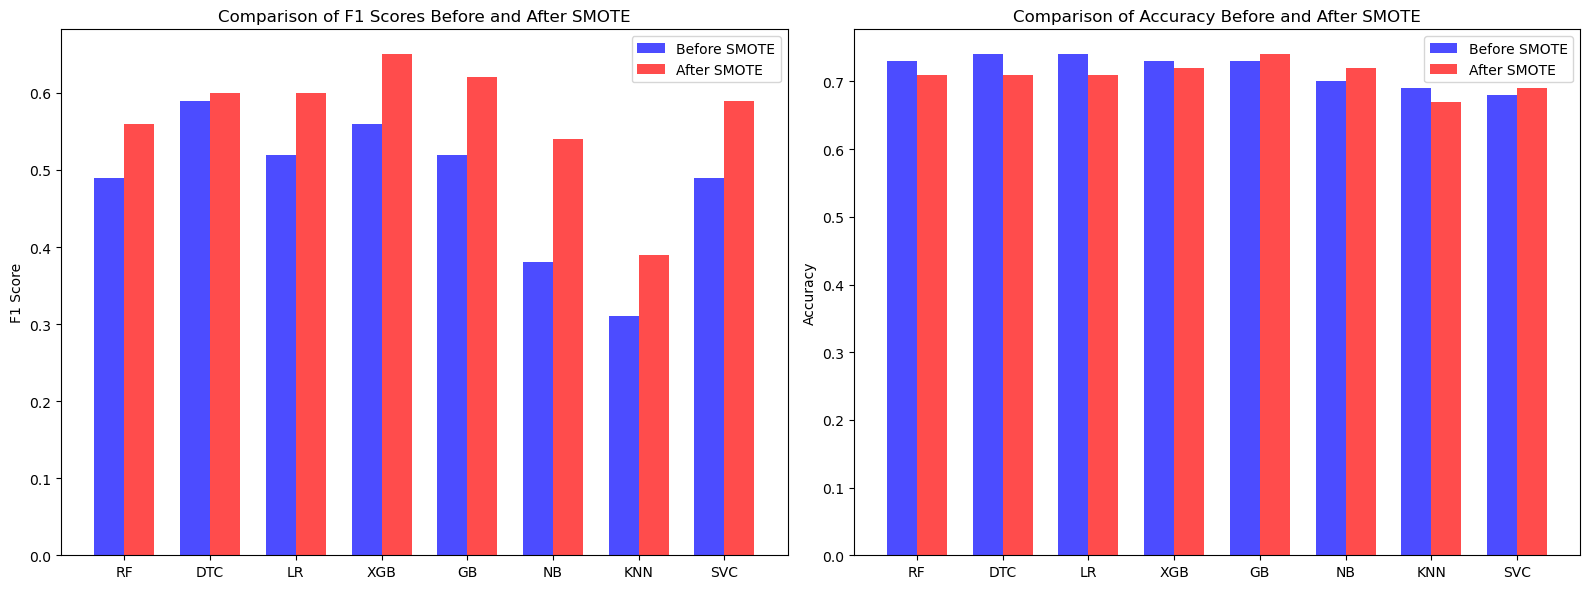

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Define your model names
models = ['RF', 'DTC', 'LR', 'XGB', 'GB', 'NB', 'KNN', 'SVC']

# Define F1 scores before SMOTE
f1_scores_before_smote = [0.49, 0.59, 0.52, 0.56, 0.52, 0.38, 0.31, 0.49]  # Replace with your actual values

# Define F1 scores after SMOTE
f1_scores_after_smote = [0.56, 0.60, 0.60, 0.65, 0.62, 0.54, 0.39, 0.59]  # Replace with your actual values

# Define accuracy scores before SMOTE
accuracy_scores_before_smote = [0.73, 0.74, 0.74, 0.73, 0.73, 0.70, 0.69, 0.68]  # Replace with your actual values

# Define accuracy scores after SMOTE
accuracy_scores_after_smote = [0.71, 0.71, 0.71, 0.72, 0.74, 0.72, 0.67, 0.69]  # Replace with your actual values

# Number of models
num_models = len(models)

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
x = np.arange(num_models)

# Create a figure with subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # Use 1 row and 2 columns

# Create bars for F1 scores before and after SMOTE
ax1.bar(x - bar_width/2, f1_scores_before_smote, bar_width, label='Before SMOTE', color='b', alpha=0.7)
ax1.bar(x + bar_width/2, f1_scores_after_smote, bar_width, label='After SMOTE', color='r', alpha=0.7)
ax1.set_ylabel('F1 Score')
ax1.set_title('Comparison of F1 Scores Before and After SMOTE')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend()

# Create bars for accuracy scores before and after SMOTE
ax2.bar(x - bar_width/2, accuracy_scores_before_smote, bar_width, label='Before SMOTE', color='b', alpha=0.7)
ax2.bar(x + bar_width/2, accuracy_scores_after_smote, bar_width, label='After SMOTE', color='r', alpha=0.7)
ax2.set_ylabel('Accuracy')
ax2.set_title('Comparison of Accuracy Before and After SMOTE')
ax2.set_xticks(x)
ax2.set_xticklabels(models)
ax2.legend()

# Adjust layout and save the plot as a high-quality image
plt.tight_layout()
plt.savefig('f1_accuracy_comparison.png', dpi=900)  # Change the file format and dpi as needed



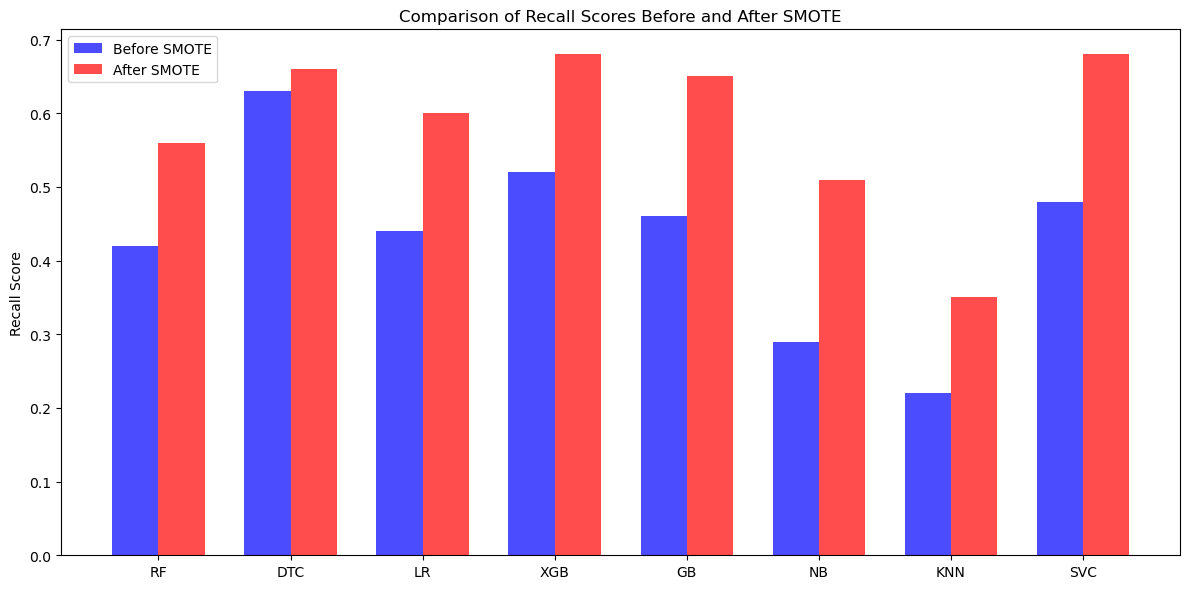

In [78]:
# Define your model names
models = ['RF', 'DTC', 'LR', 'XGB', 'GB', 'NB', 'KNN', 'SVC']

# Define recall scores before SMOTE
recall_scores_before_smote = [0.42, 0.63, 0.44, 0.52, 0.46, 0.29, 0.22, 0.48]  

# Define recall scores after SMOTE
recall_scores_after_smote = [0.56, 0.66, 0.60, 0.68, 0.65, 0.51, 0.35, 0.68]  

# Number of models
num_models = len(models)

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
x = np.arange(num_models)

# Create a figure with subplots side by side
fig, ax = plt.subplots(figsize=(12, 6))

# Create bars for recall scores before and after SMOTE
ax.bar(x - bar_width/2, recall_scores_before_smote, bar_width, label='Before SMOTE', color='b', alpha=0.7)
ax.bar(x + bar_width/2, recall_scores_after_smote, bar_width, label='After SMOTE', color='r', alpha=0.7)
ax.set_ylabel('Recall Score')
ax.set_title('Comparison of Recall Scores Before and After SMOTE')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Adjust layout and save the plot as a high-quality image
plt.tight_layout()
plt.savefig('recall_comparison.png', dpi=900)  # Change the file format and dpi as needed
